In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# initialize the grid
A = np.array([[0.5,0],[0,2]])
x_start = np.array([-6,-6]).astype(float)
x_goal = np.array([0,0]).astype(float)
x1 = np.linspace(-7.5, 7.5, 150)
x2 = np.linspace(-7.5, 7.5, 150)
X1,X2 = np.meshgrid(x1, x2)
X = np.vstack((X1.reshape((1,-1)),X2.reshape((1,-1))))
X.shape

(2, 22500)

In [3]:
# define loss function and compute loss for the grid
def loss_fcn(W, x):
    return x.T.dot(A.dot(x))/2
# define the gradient calculation
def gradient(W, x):
    return W.dot(x)
Y = np.array([])
for x in X.T:
    Y = np.append(Y, loss_fcn(A, x))
y_start = loss_fcn(A, x_start)
y_goal = loss_fcn(A, x_goal)
# plt.scatter(X1,X2,c=Y.reshape(X1.shape))

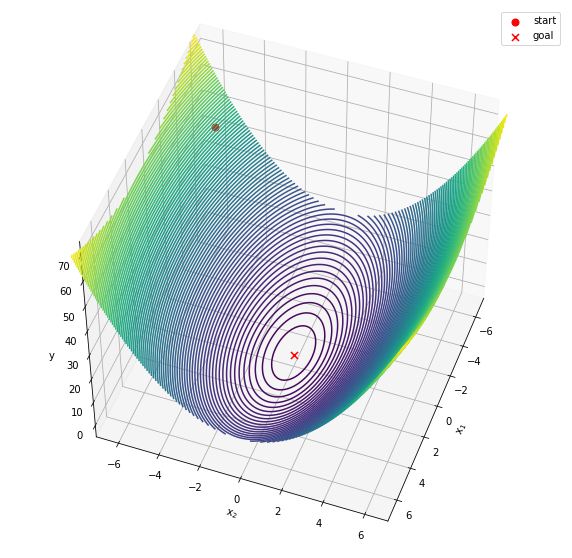

In [4]:
# 3d plot of the cost functions
from mpl_toolkits.mplot3d import axes3d
def plot_loss_3d():
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.contour3D(X1, X2, Y.reshape(X1.shape),100)
    start_plt = ax.scatter(x_start[0],x_start[1],y_start,s=50,c='r', marker = "o")
    goal_plt = ax.scatter(x_goal[0],x_goal[1],y_goal,s=50,c='r', marker = "x")
    ax.set_xlabel('$\mathregular{x_1}$')
    ax.set_ylabel('$\mathregular{x_2}$')
    ax.set_zlabel('y');
    ax.view_init(50, 20)
    ax.axis('equal')
    plt.legend([start_plt, goal_plt], ['start', 'goal'])
    ax.axis([-7,7,-7,7])
    return ax
plot_loss_3d()
plt.savefig("loss_fcn_plot_3d.png")

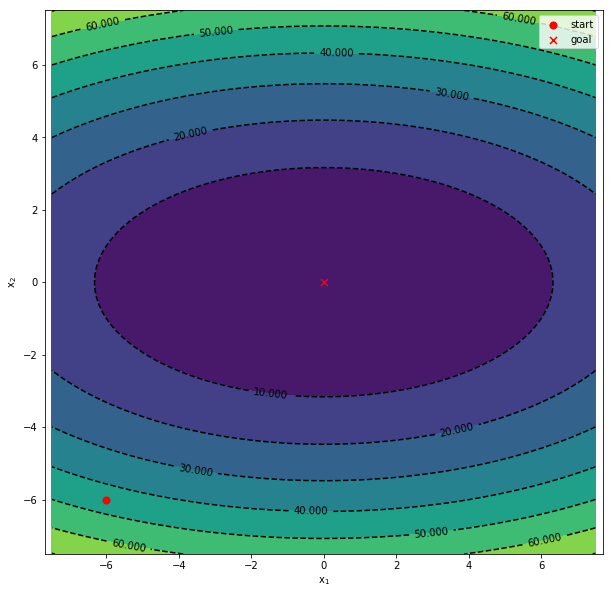

In [5]:
# 2D contour plot of the cost function
def plot_loss_2d():
    plt.figure(figsize=(10,10))
    cp = plt.contour(X1,X2,Y.reshape(X1.shape), colors='k', linestyles='dashed')
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(X1, X2, Y.reshape(X1.shape))
    start_plt = plt.scatter(x_start[0],x_start[1], s=50, c='r', marker = "o")
    goal_plt = plt.scatter(x_goal[0],x_goal[1], s=50, c='r', marker = "x")
    plt.xlabel('$\mathregular{x_1}$')
    plt.ylabel('$\mathregular{x_2}$')
    plt.axis('equal')
    plt.legend([start_plt, goal_plt], ['start', 'goal'])
plot_loss_2d()
plt.savefig("loss_fcn_plot_2d.png")

Total iterations:  15


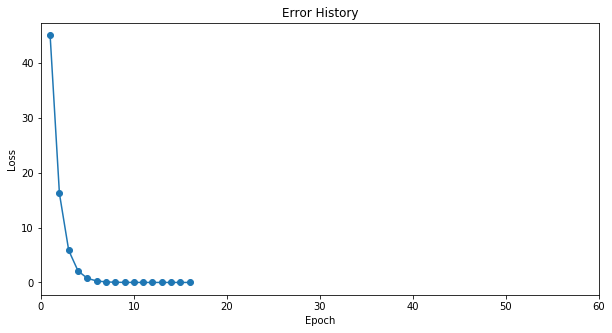

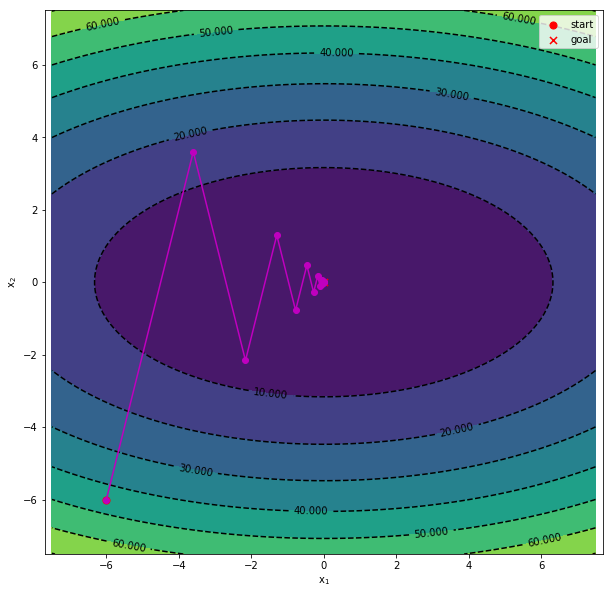

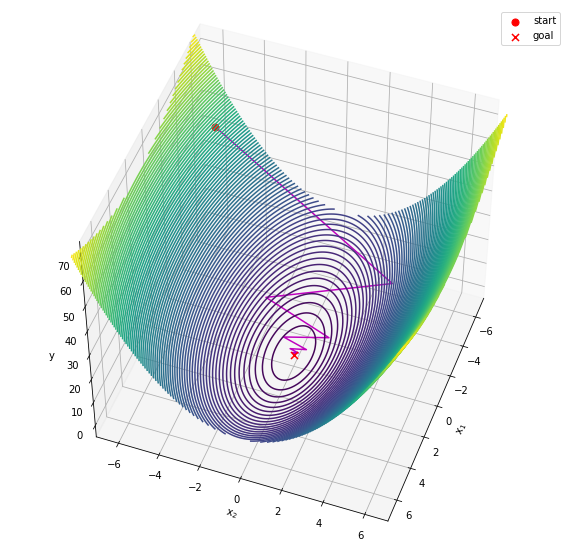

In [6]:
# Gradient Descent
lr = 0.8

# stopping criteria
max_iter = 100
iter_count = 0
grad_thres = 1e-2

#initialization
x = x_start.copy()
x_hist_gd1 = x.reshape(2,1).copy()
y_hist_gd1 = np.array([y_start])
grad_mag = float('inf')
while iter_count<max_iter and grad_mag>grad_thres:
    iter_count+=1
    grad = gradient(A,x)
    grad_mag = np.linalg.norm(grad)
    x -= lr*grad
    x_hist_gd1 = np.hstack((x_hist_gd1, x.reshape(2,1).copy()))
    y_hist_gd1 = np.hstack((y_hist_gd1, loss_fcn(A,x)))

print('Total iterations: ', iter_count)
plt.figure(figsize=(10,5))
plt.plot(range(1,len(y_hist_gd1)+1), y_hist_gd1, '-o')
plt.title('Error History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0,60])
plt.savefig("grad_descent_loss_lr={}.png".format(lr))

plot_loss_2d()
plt.plot(x_hist_gd1[0,:],x_hist_gd1[1,:],'m-o')
plt.savefig("grad_descent_2d_lr={}.png".format(lr))

ax=plot_loss_3d()
ax.plot(xs=x_hist_gd1[0,:],ys=x_hist_gd1[1,:],zs=y_hist_gd1, c='m')
plt.savefig("grad_descent_3d_lr={}.png".format(lr))

Total iterations:  56


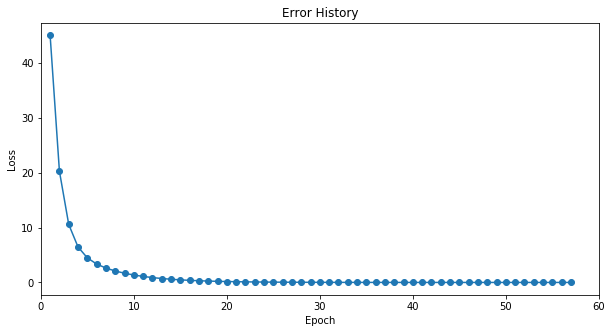

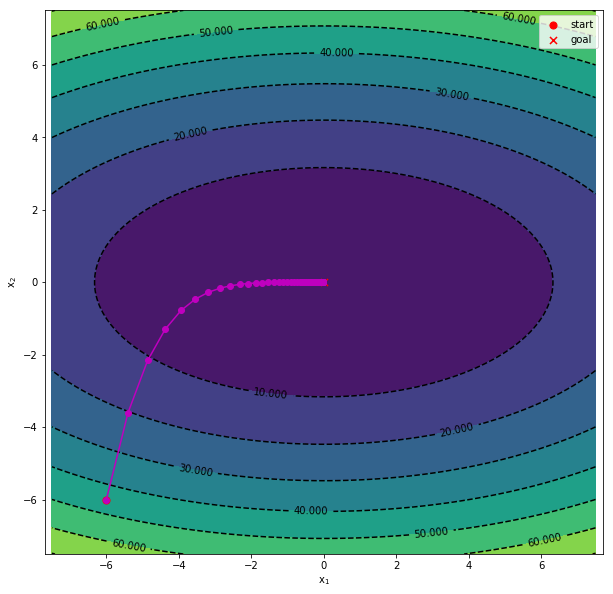

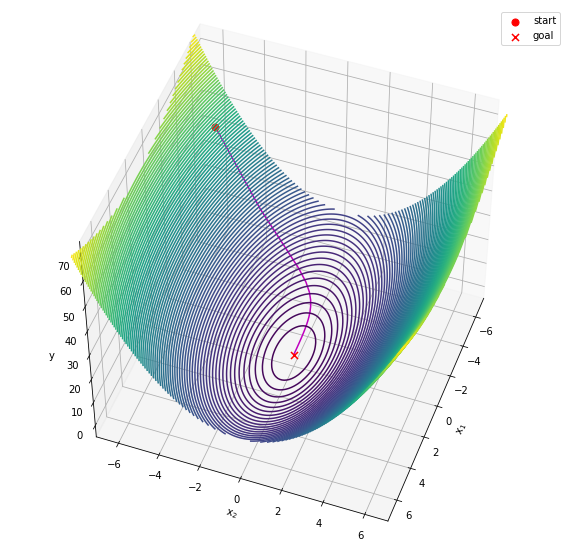

In [7]:
# Gradient Descent - smaller learning rate
lr = 0.2
max_iter = 100
iter_count = 0
x = x_start.copy()
x_hist_gd2 = x.reshape(2,1).copy()
y_hist_gd2 = np.array([y_start])
grad_mag = float('inf')
while iter_count<max_iter and grad_mag>grad_thres:
    iter_count+=1
    grad = gradient(A,x)
    grad_mag = np.linalg.norm(grad)
    x -= lr*grad
    x_hist_gd2 = np.hstack((x_hist_gd2, x.reshape(2,1).copy()))
    y_hist_gd2 = np.hstack((y_hist_gd2, loss_fcn(A,x)))

print('Total iterations: ', iter_count)
plt.figure(figsize=(10,5))
plt.plot(range(1,len(y_hist_gd2)+1), y_hist_gd2, '-o')
plt.title('Error History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0,60])
plt.savefig("grad_descent_loss_lr={}.png".format(lr))

plot_loss_2d()
plt.plot(x_hist_gd2[0,:],x_hist_gd2[1,:],'m-o')
plt.savefig("grad_descent_2d_lr={}.png".format(lr))

ax=plot_loss_3d()
ax.plot(xs=x_hist_gd2[0,:],ys=x_hist_gd2[1,:],zs=y_hist_gd2, c='m')
plt.savefig("grad_descent_3d_lr={}.png".format(lr))

Total iterations:  22


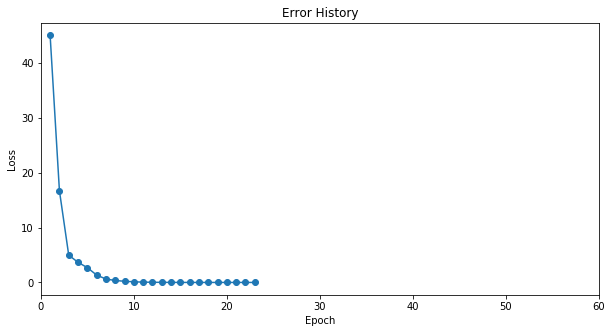

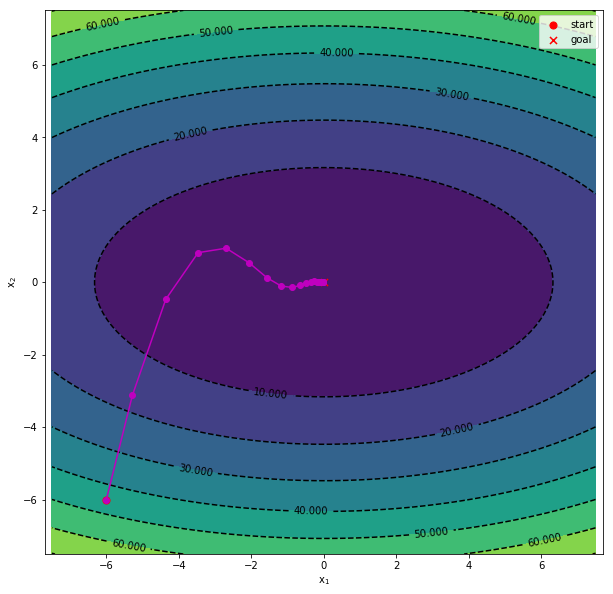

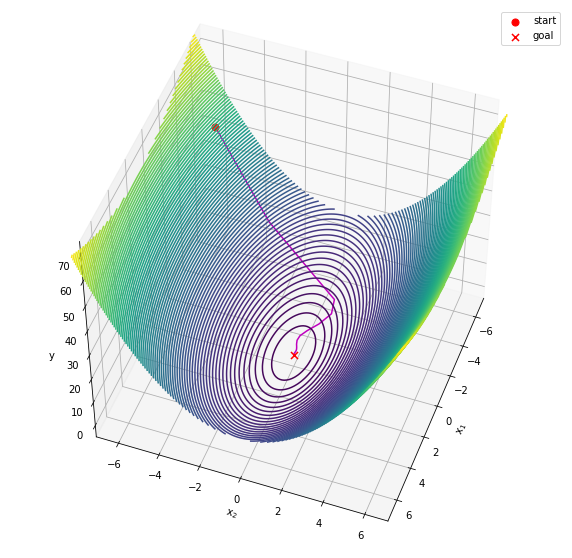

In [8]:
# Gradient Descent with Momentum
beta = 0.4
mu = 0.4
max_iter = 100
iter_count = 0
x = x_start.copy()
x_hist_moment = x.reshape(2,1).copy()
y_hist_moment = np.array([y_start])
grad_mag = float('inf')
v = np.array([0,0]).astype(float)
while iter_count<max_iter and grad_mag>grad_thres:
    iter_count+=1
    grad = gradient(A,x)
    grad_mag = np.linalg.norm(grad)
    # optimization - update velocity with gradient, then updadte weights with velocity
    v = beta*v + (1-beta)*grad
    x -= mu*v
    x_hist_moment = np.hstack((x_hist_moment, x.reshape(2,1).copy()))
    y_hist_moment = np.hstack((y_hist_moment, loss_fcn(A,x)))
print('Total iterations: ', iter_count)
plt.figure(figsize=(10,5))
plt.plot(range(1,len(y_hist_moment)+1), y_hist_moment, '-o')
plt.title('Error History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0,60])
plt.savefig("momentum_loss.png")

plot_loss_2d()
plt.plot(x_hist_moment[0,:],x_hist_moment[1,:],'m-o')
plt.savefig("momentum_2d.png")

ax=plot_loss_3d()
ax.plot(xs=x_hist_moment[0,:],ys=x_hist_moment[1,:],zs=y_hist_moment, c='m')
plt.savefig("momentum_3d.png")

Total iterations:  12


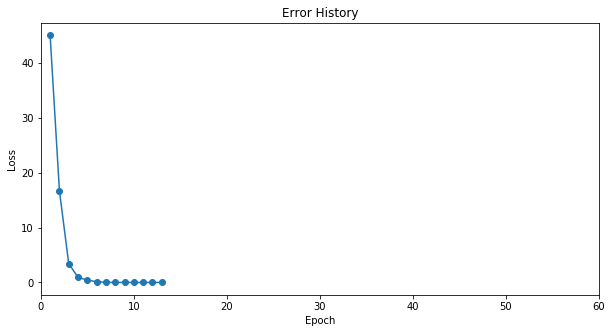

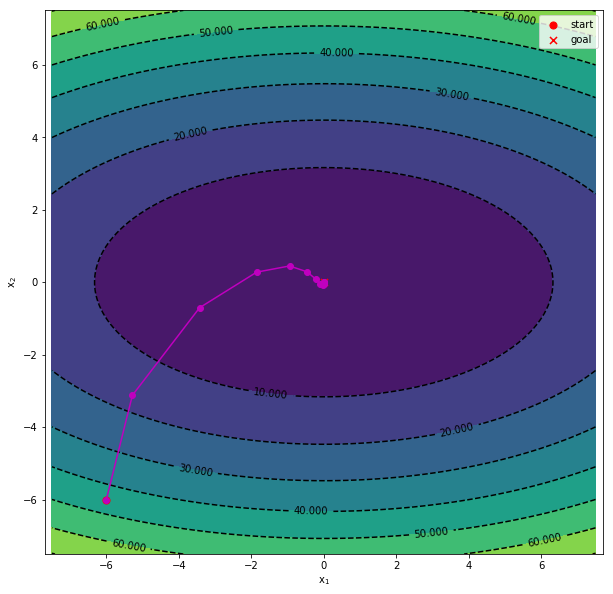

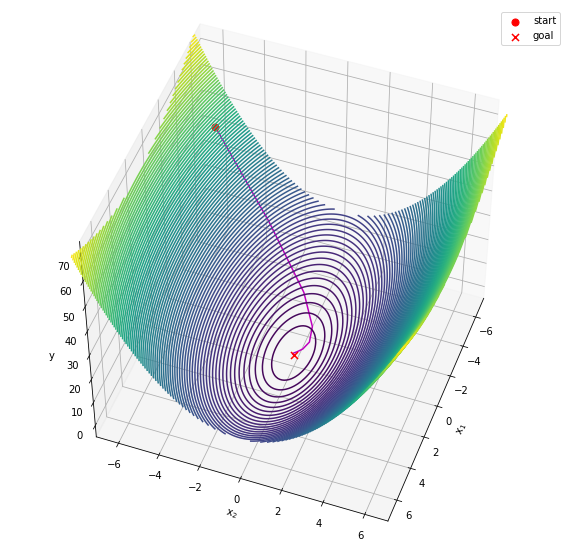

In [9]:
# Gradient Descent with Momentum + Gyroscopic Force
beta = 0.4
mu = 0.4
# Gain for gyroscopic force
k = 0.01
max_iter = 100
iter_count = 0
x = x_start.copy()
x_hist_gyro = x.reshape(2,1).copy()
y_hist_gyro = np.array([y_start])
grad_mag = float('inf')
v = np.array([0,0]).astype(float)
while iter_count<max_iter and grad_mag>grad_thres:
    iter_count+=1
    grad = gradient(A,x)
    grad_mag = np.linalg.norm(grad)
    desired_v = -x
    curl = -k * np.cross(np.hstack([v, 0]), np.cross(np.hstack([desired_v, 0]), np.hstack([v, 0])))
    curl = curl[:-1]
    v = beta*v + (1-beta)*grad + curl
    x -= mu*v
    x_hist_gyro = np.hstack((x_hist_gyro, x.reshape(2,1).copy()))
    y_hist_gyro = np.hstack((y_hist_gyro, loss_fcn(A,x)))
print('Total iterations: ', iter_count)
plt.figure(figsize=(10,5))
plt.plot(range(1,len(y_hist_gyro)+1), y_hist_gyro, '-o')
plt.title('Error History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0,60])
plt.savefig("gyroscopic_loss.png")

plot_loss_2d()
plt.plot(x_hist_gyro[0,:],x_hist_gyro[1,:],'m-o')
plt.savefig("gyroscopic_2d.png")

ax=plot_loss_3d()
ax.plot(xs=x_hist_gyro[0,:],ys=x_hist_gyro[1,:],zs=y_hist_gyro, c='m')
plt.savefig("gyroscopic_3d.png")

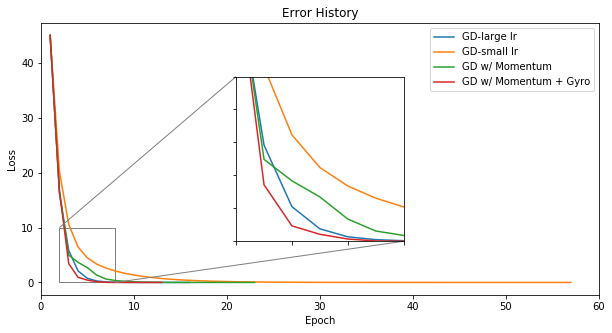

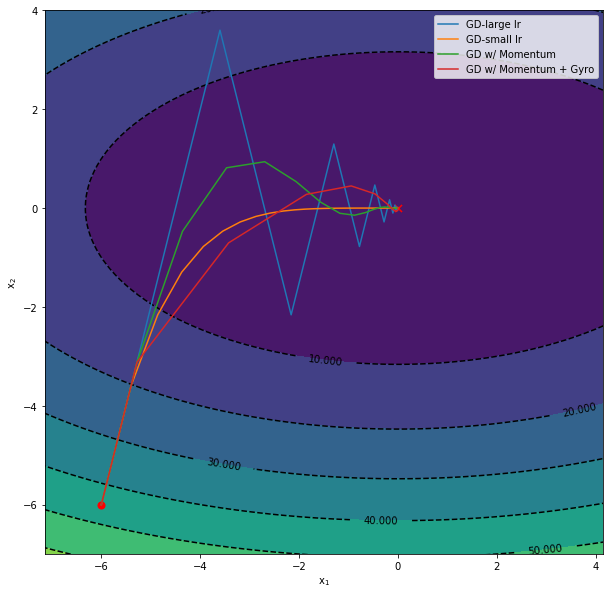

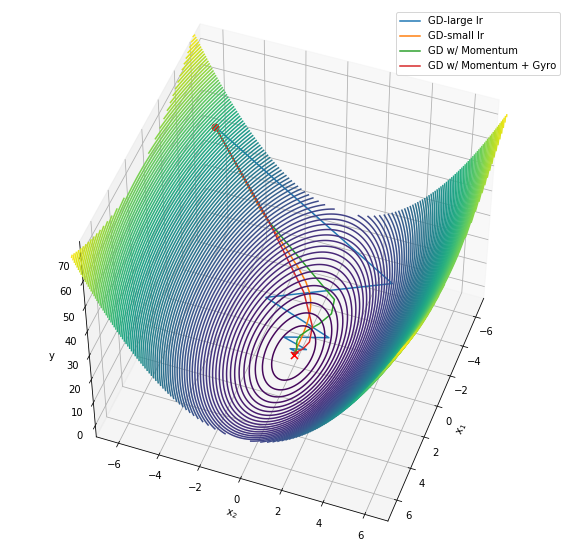

In [10]:
# Combine all plots
plt.figure(figsize=(10,5))
ax = plt.gca()
gd1, = ax.plot(range(1,len(y_hist_gd1)+1), y_hist_gd1)
gd2, = ax.plot(range(1,len(y_hist_gd2)+1), y_hist_gd2)
moment, = ax.plot(range(1,len(y_hist_moment)+1), y_hist_moment)
gyro, = ax.plot(range(1,len(y_hist_gyro)+1), y_hist_gyro)
plt.title('Error History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0,60])
plt.legend([gd1,gd2,moment,gyro], ['GD-large lr', 'GD-small lr', 'GD w/ Momentum', 'GD w/ Momentum + Gyro'])
#zoom in plot
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
axins = zoomed_inset_axes(ax, zoom=3, loc='center')
axins.plot(range(1,len(y_hist_gd1)+1), y_hist_gd1)
axins.plot(range(1,len(y_hist_gd2)+1), y_hist_gd2)
axins.plot(range(1,len(y_hist_moment)+1), y_hist_moment)
axins.plot(range(1,len(y_hist_gyro)+1), y_hist_gyro)
x1, x2, y1, y2 = 2, 8, 0, 10
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.savefig("combined_loss.png")

plot_loss_2d()
ax=plt.gca()
gd1, = ax.plot(x_hist_gd1[0,:],x_hist_gd1[1,:])
gd2, = ax.plot(x_hist_gd2[0,:],x_hist_gd2[1,:])
moment, = ax.plot(x_hist_moment[0,:],x_hist_moment[1,:])
gyro, = ax.plot(x_hist_gyro[0,:],x_hist_gyro[1,:])
plt.legend([gd1,gd2,moment,gyro], ['GD-large lr', 'GD-small lr', 'GD w/ Momentum', 'GD w/ Momentum + Gyro'])
plt.xlim([-7,4])
plt.ylim([-7,4])
plt.savefig('combined_2d.png')

ax=plot_loss_3d()
gd1, = ax.plot(x_hist_gd1[0,:],x_hist_gd1[1,:], zs=y_hist_gd1)
gd2, = ax.plot(x_hist_gd2[0,:],x_hist_gd2[1,:], zs=y_hist_gd2)
moment, = ax.plot(x_hist_moment[0,:],x_hist_moment[1,:], zs=y_hist_moment)
gyro, = ax.plot(xs=x_hist_gyro[0,:],ys=x_hist_gyro[1,:], zs=y_hist_gyro)
plt.legend([gd1,gd2,moment,gyro], ['GD-large lr', 'GD-small lr', 'GD w/ Momentum', 'GD w/ Momentum + Gyro'])
plt.savefig('combined_3d.png')